# Computational Physics Zettel 8

In [1]:
# Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt

# 8.2.1)
Die stationären Lösungen sind:

- Lösung 1: $N_i^*=P_i^*=0$
- Lösung 2: $P_i^*=0$; $N_i^*=a_i$
- Lösung 3: $d_i=\Sigma_j c_{ij}N_j$; $a_i-N_i=\Sigma_j b_{ij}P_j$

Während die Lösung der ersten beiden Fälle trivial ist, enspricht die Lösung 3 zwei LGS. Zunächst bestimmt man $C\vec{N}=\vec{d}$ und dann $B\vec{P}=\vec{a}-\vec{N}$.

Im folgenden haben wir die Werte der LGS gelöst.

In [2]:
C = np.array([[20,30,35],[3,3,3],[7,8,20]])
d = np.array([85,9,35])

n = np.linalg.solve(C,d)

B = np.array([[20,30,5],[1,3,7],[4,10,20]])
a = np.array([56,12,35])

p = np.linalg.solve(B,a-n)

x = np.concatenate((n,p))
print('N =', n)
print('P =', p)

N = [1. 1. 1.]
P = [1. 1. 1.]


# 8.2.2
Die allgemeine Jacobimatix ist:

$$
A = \left( \begin{matrix} 
a_1-2N_1-\Sigma b_{1j} P_j & 0 & 0 & -N_1 b_{11} & -N_1 b_{12}& -N_1 b_{13}\\
0 & a_2-2N_2-\Sigma b_{2j} P_j & 0 & -N_2 b_{21} & -N_2 b_{22}& -N_2 b_{23}\\
0 & 0 & a_2-2N_2-\Sigma b_{2j} P_j & -N_3 b_{31} & -N_3 b_{32}& -N_3 b_{33}\\
P_1 c_{11} & P_1 c_{12}& P_1 c_{13} & \Sigma c_{1j} N_j- d_1 & 0 & 0 \\
P_2 c_{21} & P_2 c_{22}& P_2 c_{23} & 0 & \Sigma c_{2j} N_j- d_2 & 0  \\
P_3 c_{31} & P_3 c_{32}& P_3 c_{33} & 0 & 0 & \Sigma c_{3j} N_j- d_3 
  \end{matrix} 
  \right)$$


Folgende Funktion implementiert diese Matrix. Setzen wir unseren Fixpunkt ein erhlaten wir damit folgende Matrix

In [3]:
def jac(n,p): 
    J = np.zeros((6,6))
    
    i = 0
    while i<6:
        if i < 3:
            J[i][i] = a[i]-2*n[i]-np.dot(B[i],p)
            
        if i >= 3:
            j = 0
            while j<3:
                J[j][i]=-n[j]*B[j][i-3]
                j = j+1
                
        if i < 3:
            k = 3
            while k<6:
                J[k][i]=p[k-3]*C[k-3][i]
                k = k+1
        
        if i>= 3:
            J[i][i]=np.dot(C[i-3],n)-d[i-3]
        
        i = i+1
        
        
    return J

    
DJ=jac(n,p)
print(DJ)

[[ -1.   0.   0. -20. -30.  -5.]
 [  0.  -1.   0.  -1.  -3.  -7.]
 [  0.   0.  -1.  -4. -10. -20.]
 [ 20.  30.  35.   0.   0.   0.]
 [  3.   3.   3.   0.   0.   0.]
 [  7.   8.  20.   0.   0.   0.]]


# 8.2.3
Zunächst berechnen wir die Eigenwerte und Eigenvektoren von A mithilfe von Numpy

In [4]:
eva, eig2 = np.linalg.eig(DJ)
eig = eig2.T

print(eva,eig)

[-0.5       +33.62558388j -0.5       -33.62558388j
 -0.5        +7.67949446j -0.5        -7.67949446j
 -1.13602378 +0.j          0.13602378 +0.j        ] [[-0.00808048+5.43421815e-01j -0.00138394+9.30713447e-02j
  -0.00436622+2.93633078e-01j  0.71189052+0.00000000e+00j
   0.0829838 +0.00000000e+00j  0.30991834+1.21430643e-17j]
 [-0.00808048-5.43421815e-01j -0.00138394-9.30713447e-02j
  -0.00436622-2.93633078e-01j  0.71189052-0.00000000e+00j
   0.0829838 -0.00000000e+00j  0.30991834-1.21430643e-17j]
 [-0.86913661+0.00000000e+00j  0.13809399-1.32272665e-16j
   0.34158855+8.58688121e-17j  0.01084273+1.66533346e-01j
   0.00986382+1.51498294e-01j -0.01564017-2.40217184e-01j]
 [-0.86913661-0.00000000e+00j  0.13809399+1.32272665e-16j
   0.34158855-8.58688121e-17j  0.01084273-1.66533346e-01j
   0.00986382-1.51498294e-01j -0.01564017+2.40217184e-01j]
 [-0.53762066+0.00000000e+00j  0.29472269+0.00000000e+00j
   0.07549029+0.00000000e+00j -0.64384894+0.00000000e+00j
   0.44208849+0.00000000e+00j 

Aus der VL wissen wir, dass, wenn $\vec{u}(t)=\vec{u}^*+\vec{v(t)}$, durch Vergleich mit der Taylorreihe gilt (wobei f die Ableitungen sind):
$$\frac{d\vec{v}}{dt}=D\vec{f}(\vec{u}^*)\vec{v}(t)$$
Eine Lösung des Problems ist gegeben durch die Exponentialfunktion:
$$\vec{v}(t)=\vec{v}(0)e^{(D\vec{f}(\vec{v}^* t))}$$
Aus der Reihendarstelleng gilt dann, wenn $\vec{x}_i$ Eignvektoren mit Eigenwerten $\lambda_i$  von A sind:
Nach eingigen zwischenschirtten erhält man dann (siehe VL) für einen Startzustand $\vec{v}(0)=\Sigma c_i \vec{x}_i$:

$$ \vec{v}(t)=\Sigma c_i e^{\lambda_i t} \vec{x}_i $$.

Im folgenden Implementieren wir diese Zeitentwicklung für gegebene Startwerte (siehe Aufgabenstellung) und plotten die Ergebnisse noch. Im ersten Plot haben wir den Realteil geplottet, im 2. den Betrag. Im letzten Plot haben wir noch das Verhältnis zwischen Beute und Räuber des selben Index geplottet

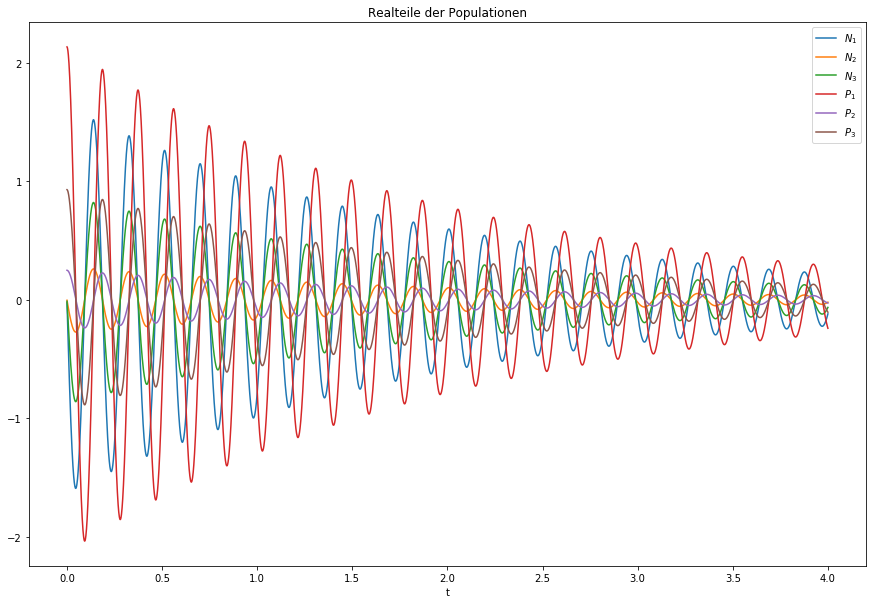

In [5]:
def v(t):
    v=([])
    for i in range(6):
        w = 3*np.exp(eva[0]*t)*eig[0][i]
        +3*np.exp(eva[1]*t)*eig[1][i]
        +1*np.exp(eva[2]*t)*eig[2][i]
        +1*np.exp(eva[3]*t)*eig[3][i]
        -5*np.exp(eva[4]*t)*eig[4][i]
        +0.1*np.exp(eva[5]*t)*eig[5][i]
        v.append(w)
    return v

t = np.linspace(0,4,5000)
plt.figure(figsize=(15,10))

for i in range(6):
    if i<3:
        plt.plot(t,v(t)[i].real, label=r'$N_%d$'%(i+1))
    if i>=3:
        plt.plot(t,v(t)[i].real, label=r'$P_%d$' %(i-2))
plt.legend()
plt.xlabel('t')
plt.title('Realteile der Populationen')
plt.show()
#plt.xlim(0,0.5)

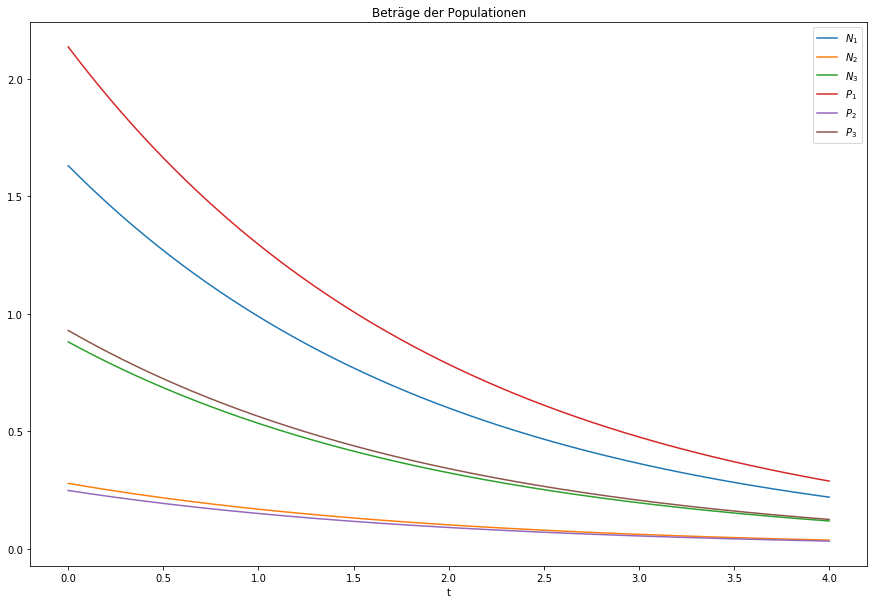

In [6]:
plt.figure(figsize=(15,10))
for i in range(6):
    if i<3:
        plt.plot(t,np.abs(v(t)[i]), label=r'$N_%d$'%(i+1))
    if i>=3:
        plt.plot(t,np.abs(v(t)[i]), label=r'$P_%d$' %(i-2))
plt.legend()
plt.xlabel('t')
plt.title('Beträge der Populationen')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
for i in range(3):
    plt.plot(t,np.abs(v(t)[i])/np.abs(v(t)[i+3]), label=r'$N_%d/P_%d$'%((i+1),(i+1)))
plt.legend()
plt.xlabel('t')
plt.title('Verhätlnisse der Beute und Räuber')
plt.show()

Wir sehen, das die Real- und Imaginärteile um 0 Oszillieren (alle haben die gleiche Periodendauer und die Phasenverschiebung bleibt konstant) und ihr Betrag allerdings stetig (mit der Zeit) abnimmt. Wir erkennen zudem, dass es eine feste Phasenverschiebung zwischen Beute (N) und Räuber (P) gibt. Diese liegt bei etwa einer viertel Phase (wahrscheinlich sogar exakt, aber wir sind zu faul).  Die Einhüllende beschreibt einen exponetiellen Abfall, der mithilfe der Norm nochmal dargestellt ist.Im letzen Plot sieht man, das die Verhältnise zwischen Beute und Räuber konstant sind. (Auch bei allen anderen Kombinationen)